In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Import Libreries

In [2]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers, callbacks
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard,EarlyStopping
from tensorflow.keras.optimizers import Adam

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import brier_score_loss
from sklearn.metrics import classification_report

import plotly.express as px




# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

pd.set_option('display.max_columns',100)

# Load Data

In [3]:
submission= pd.read_csv('../input/spaceship-titanic/sample_submission.csv')
submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [4]:
test= pd.read_csv('../input/spaceship-titanic/test.csv')
test

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [5]:
train= pd.read_csv('../input/spaceship-titanic/train.csv')
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# Preprocessing

### 1.- Cleaning data

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


Detect some nulls on multiple variables. We need to correct that.
1. We can divide PassengerId into group and identification
2. CryoSleep should be Bool
3. We will divide the cabins by deck/number/side
4. We will create a series of variables, RoomServiceUse, FoodCourtBuy, Shooping, SpaUse and VRUse. Here we will describe whether or not the service was used.
5. We will group RoomService, FoodCourt, ShoppingMall, Spa, VRDeck through k-neighbors.
6. We will split the first and last name.
7. We will create the variable family, if more than one person has the surname it will have value True.

In [7]:
train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [8]:
train.shape

(8693, 14)

In [9]:
train.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [10]:
fig = px.box(train, y="ShoppingMall")
fig.show()


#### Null corrections

from sklearn.impute import SimpleImputer
miss_mean_imputer = SimpleImputer()

miss_mean_imputer = miss_mean_imputer.fit(train)

train = miss_mean_imputer.transform(train.values)

print(train)

#### Divide Passangers

In [11]:
train['PassengerId'].head()

0    0001_01
1    0002_01
2    0003_01
3    0003_02
4    0004_01
Name: PassengerId, dtype: object

In [12]:
passenger= train['PassengerId'].str.split('_',expand=True)
passenger.columns = ['Group', 'Number']
train = pd.concat([train, passenger], axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01


#### Divide Cabin

In [13]:
train['Cabin'].head()

0    B/0/P
1    F/0/S
2    A/0/S
3    A/0/S
4    F/1/S
Name: Cabin, dtype: object

In [14]:
cabin= train['Cabin'].str.split('/',expand=True)
cabin.columns = ['deck', 'num','side']
train = pd.concat([train, cabin], axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S


#### Divide Name

In [15]:
name= train['Name'].str.split(' ',expand=True)
name.columns = ['First_name', 'Second_name']
train = pd.concat([train, name], axis=1)
train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,deck,num,side,First_name,Second_name
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,0001,01,B,0,P,Maham,Ofracculy
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,0002,01,F,0,S,Juanna,Vines
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0003,01,A,0,S,Altark,Susent
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0003,02,A,0,S,Solam,Susent
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,0004,01,F,1,S,Willy,Santantines


### New Variables

In [16]:
train.reset_index(drop=True, inplace=True)

In [17]:
train['RoomServiceUse']=0
train['FoodCourtBuy']=0
train['Shooping']=0
train['SpaUse']=0
train['VRUse']=0

for i in range(len(train['RoomService'])):
    if train['RoomService'][i] > 0:
        train['RoomServiceUse'][i] = 1
        
    if train['ShoppingMall'][i] > 0:
        train['Shooping'][i] = 1
        
    if train['FoodCourt'][i] > 0:
        train['FoodCourtBuy'][i] = 1
        
    if train['Spa'][i] > 0:
        train['SpaUse'][i] = 1
        
    if train['VRDeck'][i] > 0:
        train['VRUse'][i] = 1

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
fig = px.violin(test, y="Age")
fig.show()

### Agroup variables

In [19]:
# Age Group
bins = [0, 11, 22, 33, 44, 55, 66,1000]
names = ["1", "2", "3", "4", "5", "6",'7']
train["Age_Group"] = pd.cut(train["Age"], bins, labels = names)

# RoomService
bins = [0, 20.4, 40.8, 61.2, 81.6, 102, 10000]
names = ["1", "2", "3", "4", "5", "6" ]
train["RoomService_Group"] = pd.cut(train["RoomService"], bins, labels = names)

# FoodCourt
bins = [0, 20.4, 40.8, 61.2, 81.6, 102, 10000]
names = ["1", "2", "3", "4", "5", "6" ]
train["FoodCourt_Group"] = pd.cut(train["FoodCourt"], bins, labels = names)

# ShoppingMall
bins = [0, 16.4, 32.8, 49.2, 65.6, 82, 10000]
names = ["1", "2", "3", "4", "5", "6" ]
train["ShoppingMall_Group"] = pd.cut(train["ShoppingMall"], bins, labels = names)

# Spa
bins = [0, 24.8, 49.6, 74.4, 99.2, 124, 10000]
names = ["1", "2", "3", "4", "5", "6" ]
train["Spa_Group"] = pd.cut(train["Spa"], bins, labels = names)

# VRDeck
bins = [0,  22.5,  45,  67.5,  90, 100000]
names = ["1", "2", "3", "4", "5" ]
train["VRDeck_Group"] = pd.cut(train["VRDeck"], bins, labels = names)

In [20]:
train["Age_Group"]=train["Age_Group"].astype(float).fillna('0')
train["Age_Group"].value_counts()

3.0    2645
2.0    2272
4.0    1592
5.0     810
1.0     587
0       357
6.0     353
7.0      77
Name: Age_Group, dtype: int64

In [21]:
train["RoomService_Group"]= train["RoomService_Group"].astype(float).fillna('0')
train["RoomService_Group"].value_counts()

0      5759
6.0    1905
1.0     579
2.0     181
3.0     118
5.0      78
4.0      73
Name: RoomService_Group, dtype: int64

In [22]:
train["FoodCourt_Group"]= train["FoodCourt_Group"].astype(float).fillna('0')
train["FoodCourt_Group"].value_counts()

0      5691
6.0    1982
1.0     597
2.0     173
3.0     114
5.0      73
4.0      63
Name: FoodCourt_Group, dtype: int64

In [23]:
train["ShoppingMall_Group"]= train["ShoppingMall_Group"].astype(float).fillna('0')
train["ShoppingMall_Group"].value_counts()

0      5799
6.0    1752
1.0     643
2.0     202
3.0     129
4.0      90
5.0      78
Name: ShoppingMall_Group, dtype: int64

In [24]:
train["Spa_Group"]= train["Spa_Group"].astype(float).fillna('0')
train["Spa_Group"].value_counts()

0      5531
6.0    1835
1.0     772
2.0     217
3.0     144
5.0      97
4.0      97
Name: Spa_Group, dtype: int64

In [25]:
train["VRDeck_Group"]= train["VRDeck_Group"].astype(float).fillna('0')
train["VRDeck_Group"].value_counts()

0      5683
5.0    1886
1.0     685
2.0     197
3.0     128
4.0     114
Name: VRDeck_Group, dtype: int64

### Categorical Variables

In [26]:
train["num"]= train["num"].astype(float)
train["Number"]= train["Number"].astype(float)
train["Group"]= train["Group"].astype(float)
train['Transported']=train['Transported'].astype(bool)

In [27]:
object_cols = ['HomePlanet', 'CryoSleep','Destination','VIP','deck','side','First_name','Second_name']

ordinal_encoder = OrdinalEncoder()
train[object_cols] = ordinal_encoder.fit_transform(train[object_cols])

### Family

In [28]:
def get_indexes(ls,index):
    return [i for i in range(len(ls)) if ls[i] == index];

In [29]:
train['Second_name'].describe()

count    8493.000000
mean     1110.891205
std       641.481916
min         0.000000
25%       554.000000
50%      1110.000000
75%      1650.000000
max      2216.000000
Name: Second_name, dtype: float64

In [30]:
mask = train.Second_name.duplicated(keep=False)
train['family']=mask

In [31]:
mask1 = train.Group.duplicated(keep=False)
train['InGroup']=mask1

In [32]:
train = pd.get_dummies(train, columns=['deck','side'])

In [33]:
train = pd.get_dummies(train, columns=['CryoSleep','VIP'])

In [34]:
train = pd.get_dummies(train, columns=['Destination'])

In [35]:
train = pd.get_dummies(train, columns=['HomePlanet'])

In [36]:
train

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,num,First_name,Second_name,RoomServiceUse,FoodCourtBuy,Shooping,SpaUse,VRUse,Age_Group,RoomService_Group,FoodCourt_Group,ShoppingMall_Group,Spa_Group,VRDeck_Group,family,InGroup,deck_0.0,deck_1.0,deck_2.0,deck_3.0,deck_4.0,deck_5.0,deck_6.0,deck_7.0,side_0.0,side_1.0,CryoSleep_0.0,CryoSleep_1.0,VIP_0.0,VIP_1.0,Destination_0.0,Destination_1.0,Destination_2.0,HomePlanet_0.0,HomePlanet_1.0,HomePlanet_2.0
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,1.0,0.0,1614.0,1431.0,0,0,0,0,0,4.0,0,0,0,0,0,False,False,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,1.0,0.0,1407.0,2109.0,1,1,1,1,1,3.0,6.0,1.0,2.0,6.0,2.0,True,False,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,1.0,0.0,156.0,1990.0,1,1,0,1,1,6.0,3.0,6.0,0,6.0,3.0,True,True,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3.0,2.0,0.0,2276.0,1990.0,0,1,1,1,1,3.0,0,6.0,6.0,6.0,5.0,True,True,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4.0,1.0,1.0,2642.0,1778.0,1,1,1,1,1,2.0,6.0,4.0,6.0,6.0,1.0,True,False,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276.0,1.0,98.0,1135.0,1416.0,0,1,0,1,1,4.0,0,6.0,0,6.0,4.0,True,False,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278.0,1.0,1499.0,1492.0,1341.0,0,0,0,0,0,2.0,0,0,0,0,0,True,False,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279.0,1.0,1500.0,955.0,470.0,0,0,1,1,0,3.0,0,0,6.0,1.0,0,True,False,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280.0,1.0,608.0,526.0,996.0,0,1,0,1,1,3.0,0,6.0,0,6.0,5.0,True,True,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0


## Clean Test

In [37]:
test.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name'],
      dtype='object')

In [38]:
from sklearn.impute import SimpleImputer
miss_mean_imputer = SimpleImputer( strategy = 'mean')

result_mean_imputer  = miss_mean_imputer.fit_transform(test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']])
test[['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']]=pd.DataFrame(result_mean_imputer, columns=['Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck'])


In [39]:
def clean_Data(train):
    
    passenger= train['PassengerId'].str.split('_',expand=True)
    passenger.columns = ['Group', 'Number']
    train = pd.concat([train, passenger], axis=1)

    cabin= train['Cabin'].str.split('/',expand=True)
    cabin.columns = ['deck', 'num','side']
    train = pd.concat([train, cabin], axis=1)

    name= train['Name'].str.split(' ',expand=True)
    name.columns = ['First_name', 'Second_name']
    train = pd.concat([train, name], axis=1)
    
    
    train['RoomServiceUse']=0
    train['FoodCourtBuy']=0
    train['Shooping']=0
    train['SpaUse']=0
    train['VRUse']=0

    for i in range(len(train['RoomService'])):
        if train['RoomService'][i] > 0:
            train['RoomServiceUse'][i] = 1

        if train['ShoppingMall'][i] > 0:
            train['Shooping'][i] = 1

        if train['FoodCourt'][i] > 0:
            train['FoodCourtBuy'][i] = 1

        if train['Spa'][i] > 0:
            train['SpaUse'][i] = 1

        if train['VRDeck'][i] > 0:
            train['VRUse'][i] = 1

    # Age Group
    bins = [-1, 11, 22, 33, 44, 55, 66,10000]
    names = ["1", "2", "3", "4", "5", "6",'7']
    train["Age_Group"] = pd.cut(train["Age"], bins, labels = names)

    # RoomService
    bins = [-1, 20.4, 40.8, 61.2, 81.6, 102, 100000]
    names = ["1", "2", "3", "4", "5", "6" ]
    train["RoomService_Group"] = pd.cut(train["RoomService"], bins, labels = names)

    # FoodCourt
    bins = [-1, 20.4, 40.8, 61.2, 81.6, 102, 100000]
    names = ["1", "2", "3", "4", "5", "6" ]
    train["FoodCourt_Group"] = pd.cut(train["FoodCourt"], bins, labels = names)

    # ShoppingMall
    bins = [-1, 16.4, 32.8, 49.2, 65.6, 82, 100000]
    names = ["1", "2", "3", "4", "5", "6" ]
    train["ShoppingMall_Group"] = pd.cut(train["ShoppingMall"], bins, labels = names)

    # Spa
    bins = [-1, 24.8, 49.6, 74.4, 99.2, 124, 100000]
    names = ["1", "2", "3", "4", "5", "6" ]
    train["Spa_Group"] = pd.cut(train["Spa"], bins, labels = names)

    # VRDeck
    bins = [-1,  22.5,  45,  67.5,  90, 1000000]
    names = ["1", "2", "3", "4", "5" ]
    train["VRDeck_Group"] = pd.cut(train["VRDeck"], bins, labels = names)



    train["num"]= train["num"].astype(float)
    train["Number"]= train["Number"].astype(float)
    train["Group"]= train["Group"].astype(float)


    object_cols = ['HomePlanet', 'CryoSleep','Destination','VIP','deck','side','First_name','Second_name']
    ordinal_encoder = OrdinalEncoder()
    train[object_cols] = ordinal_encoder.fit_transform(train[object_cols])
    
    def get_indexes(ls,index):
        return [i for i in range(len(ls)) if ls[i] == index];

    mask = train.Second_name.duplicated(keep=False)
    train['family']=mask
    mask1 = train.Group.duplicated(keep=False)
    train['InGroup']=mask1
    train = pd.get_dummies(train, columns=['deck','side'])
    train = pd.get_dummies(train, columns=['CryoSleep','VIP'])
    train = pd.get_dummies(train, columns=['Destination'])
    train = pd.get_dummies(train, columns=['HomePlanet'])
    
    return train




In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4277 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4277 non-null   float64
 8   FoodCourt     4277 non-null   float64
 9   ShoppingMall  4277 non-null   float64
 10  Spa           4277 non-null   float64
 11  VRDeck        4277 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [41]:
test.fillna(method="bfill")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.000000,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.000000,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.000000,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.000000,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.000000,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.000000,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,D/296/P,TRAPPIST-1e,42.000000,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,28.658146,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,PSO J318.5-22,28.658146,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [42]:
test=clean_Data(test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [43]:
test.isnull().sum()

PassengerId             0
Cabin                 100
Age                     0
RoomService             0
FoodCourt               0
ShoppingMall            0
Spa                     0
VRDeck                  0
Name                   94
Group                   0
Number                  0
num                   100
First_name             94
Second_name            94
RoomServiceUse          0
FoodCourtBuy            0
Shooping                0
SpaUse                  0
VRUse                   0
Age_Group               0
RoomService_Group       0
FoodCourt_Group         0
ShoppingMall_Group      0
Spa_Group               0
VRDeck_Group            0
family                  0
InGroup                 0
deck_0.0                0
deck_1.0                0
deck_2.0                0
deck_3.0                0
deck_4.0                0
deck_5.0                0
deck_6.0                0
deck_7.0                0
side_0.0                0
side_1.0                0
CryoSleep_0.0           0
CryoSleep_1.

In [44]:
test['Age_Group'].value_counts()

3    1379
2    1199
4     772
5     381
1     338
6     175
7      33
Name: Age_Group, dtype: int64

In [45]:
train['num'][train['num'].isnull() ==True]= 2000
test['num'][test['num'].isnull() ==True]= 2000

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Modeling / Train-Test Data

In [46]:
train.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Group',
       'Number', 'num', 'First_name', 'Second_name', 'RoomServiceUse',
       'FoodCourtBuy', 'Shooping', 'SpaUse', 'VRUse', 'Age_Group',
       'RoomService_Group', 'FoodCourt_Group', 'ShoppingMall_Group',
       'Spa_Group', 'VRDeck_Group', 'family', 'InGroup', 'deck_0.0',
       'deck_1.0', 'deck_2.0', 'deck_3.0', 'deck_4.0', 'deck_5.0', 'deck_6.0',
       'deck_7.0', 'side_0.0', 'side_1.0', 'CryoSleep_0.0', 'CryoSleep_1.0',
       'VIP_0.0', 'VIP_1.0', 'Destination_0.0', 'Destination_1.0',
       'Destination_2.0', 'HomePlanet_0.0', 'HomePlanet_1.0',
       'HomePlanet_2.0'],
      dtype='object')

In [47]:
train

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,num,First_name,Second_name,RoomServiceUse,FoodCourtBuy,Shooping,SpaUse,VRUse,Age_Group,RoomService_Group,FoodCourt_Group,ShoppingMall_Group,Spa_Group,VRDeck_Group,family,InGroup,deck_0.0,deck_1.0,deck_2.0,deck_3.0,deck_4.0,deck_5.0,deck_6.0,deck_7.0,side_0.0,side_1.0,CryoSleep_0.0,CryoSleep_1.0,VIP_0.0,VIP_1.0,Destination_0.0,Destination_1.0,Destination_2.0,HomePlanet_0.0,HomePlanet_1.0,HomePlanet_2.0
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1.0,1.0,0.0,1614.0,1431.0,0,0,0,0,0,4.0,0,0,0,0,0,False,False,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2.0,1.0,0.0,1407.0,2109.0,1,1,1,1,1,3.0,6.0,1.0,2.0,6.0,2.0,True,False,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3.0,1.0,0.0,156.0,1990.0,1,1,0,1,1,6.0,3.0,6.0,0,6.0,3.0,True,True,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3.0,2.0,0.0,2276.0,1990.0,0,1,1,1,1,3.0,0,6.0,6.0,6.0,5.0,True,True,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4.0,1.0,1.0,2642.0,1778.0,1,1,1,1,1,2.0,6.0,4.0,6.0,6.0,1.0,True,False,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False,9276.0,1.0,98.0,1135.0,1416.0,0,1,0,1,1,4.0,0,6.0,0,6.0,4.0,True,False,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False,9278.0,1.0,1499.0,1492.0,1341.0,0,0,0,0,0,2.0,0,0,0,0,0,True,False,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True,9279.0,1.0,1500.0,955.0,470.0,0,0,1,1,0,3.0,0,0,6.0,1.0,0,True,False,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False,9280.0,1.0,608.0,526.0,996.0,0,1,0,1,1,3.0,0,6.0,0,6.0,5.0,True,True,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0


In [48]:
train['Transported']=train['Transported'].replace(True,1)
train['Transported']=train['Transported'].replace(False,0)
train['Transported']

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [49]:
train

,PassengerId,Cabin,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Group,Number,num,First_name,Second_name,RoomServiceUse,FoodCourtBuy,Shooping,SpaUse,VRUse,Age_Group,RoomService_Group,FoodCourt_Group,ShoppingMall_Group,Spa_Group,VRDeck_Group,family,InGroup,deck_0.0,deck_1.0,deck_2.0,deck_3.0,deck_4.0,deck_5.0,deck_6.0,deck_7.0,side_0.0,side_1.0,CryoSleep_0.0,CryoSleep_1.0,VIP_0.0,VIP_1.0,Destination_0.0,Destination_1.0,Destination_2.0,HomePlanet_0.0,HomePlanet_1.0,HomePlanet_2.0
0,0001_01,B/0/P,39.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1.0,1.0,0.0,1614.0,1431.0,0,0,0,0,0,4.0,0,0,0,0,0,False,False,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
1,0002_01,F/0/S,24.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,2.0,1.0,0.0,1407.0,2109.0,1,1,1,1,1,3.0,6.0,1.0,2.0,6.0,2.0,True,False,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0
2,0003_01,A/0/S,58.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,3.0,1.0,0.0,156.0,1990.0,1,1,0,1,1,6.0,3.0,6.0,0,6.0,3.0,True,True,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
3,0003_02,A/0/S,33.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,3.0,2.0,0.0,2276.0,1990.0,0,1,1,1,1,3.0,0,6.0,6.0,6.0,5.0,True,True,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
4,0004_01,F/1/S,16.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,4.0,1.0,1.0,2642.0,1778.0,1,1,1,1,1,2.0,6.0,4.0,6.0,6.0,1.0,True,False,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,A/98/P,41.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,9276.0,1.0,98.0,1135.0,1416.0,0,1,0,1,1,4.0,0,6.0,0,6.0,4.0,True,False,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0
8689,9278_01,G/1499/S,18.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,9278.0,1.0,1499.0,1492.0,1341.0,0,0,0,0,0,2.0,0,0,0,0,0,True,False,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0
8690,9279_01,G/1500/S,26.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,9279.0,1.0,1500.0,955.0,470.0,0,0,1,1,0,3.0,0,0,6.0,1.0,0,True,False,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0
8691,9280_01,E/608/S,32.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,9280.0,1.0,608.0,526.0,996.0,0,1,0,1,1,3.0,0,6.0,0,6.0,5.0,True,True,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0


In [50]:
train.columns

Index(['PassengerId', 'Cabin', 'Age', 'RoomService', 'FoodCourt',
       'ShoppingMall', 'Spa', 'VRDeck', 'Name', 'Transported', 'Group',
       'Number', 'num', 'First_name', 'Second_name', 'RoomServiceUse',
       'FoodCourtBuy', 'Shooping', 'SpaUse', 'VRUse', 'Age_Group',
       'RoomService_Group', 'FoodCourt_Group', 'ShoppingMall_Group',
       'Spa_Group', 'VRDeck_Group', 'family', 'InGroup', 'deck_0.0',
       'deck_1.0', 'deck_2.0', 'deck_3.0', 'deck_4.0', 'deck_5.0', 'deck_6.0',
       'deck_7.0', 'side_0.0', 'side_1.0', 'CryoSleep_0.0', 'CryoSleep_1.0',
       'VIP_0.0', 'VIP_1.0', 'Destination_0.0', 'Destination_1.0',
       'Destination_2.0', 'HomePlanet_0.0', 'HomePlanet_1.0',
       'HomePlanet_2.0'],
      dtype='object')

In [51]:
total=[ 'Group','InGroup','Age_Group', 'RoomService_Group',
       'FoodCourt_Group', 'ShoppingMall_Group', 'Spa_Group', 'VRDeck_Group',
       'family','deck_0.0', 'deck_1.0', 'deck_3.0', 'deck_4.0', 'deck_5.0',
       'deck_6.0', 'side_0.0', 'side_1.0','CryoSleep_0.0', 'CryoSleep_1.0', 'VIP_0.0', 'VIP_1.0',
       'Destination_0.0', 'Destination_1.0', 'Destination_2.0','Transported','HomePlanet_0.0','HomePlanet_1.0','HomePlanet_2.0']
total_df=train[total]

In [52]:
from sklearn.impute import SimpleImputer
miss_mean_imputer = SimpleImputer( strategy = 'mean')

result_mean_imputer  = miss_mean_imputer.fit_transform(total_df)
pd.DataFrame(result_mean_imputer, columns=['Group',
       'InGroup','Age_Group', 'RoomService_Group',
       'FoodCourt_Group', 'ShoppingMall_Group', 'Spa_Group', 'VRDeck_Group',
       'family','deck_0.0', 'deck_1.0', 'deck_3.0', 'deck_4.0', 'deck_5.0',
       'deck_6.0', 'side_0.0', 'side_1.0','CryoSleep_0.0', 'CryoSleep_1.0', 'VIP_0.0', 'VIP_1.0',
       'Destination_0.0', 'Destination_1.0', 'Destination_2.0','Transported','HomePlanet_0.0','HomePlanet_1.0','HomePlanet_2.0'])


print(total_df)

       Group  InGroup Age_Group RoomService_Group FoodCourt_Group  \
0        1.0    False       4.0                 0               0   
1        2.0    False       3.0               6.0             1.0   
2        3.0     True       6.0               3.0             6.0   
3        3.0     True       3.0                 0             6.0   
4        4.0    False       2.0               6.0             4.0   
...      ...      ...       ...               ...             ...   
8688  9276.0    False       4.0                 0             6.0   
8689  9278.0    False       2.0                 0               0   
8690  9279.0    False       3.0                 0               0   
8691  9280.0     True       3.0                 0             6.0   
8692  9280.0     True       4.0               6.0             6.0   

     ShoppingMall_Group Spa_Group VRDeck_Group  family  deck_0.0  deck_1.0  \
0                     0         0            0   False         0         1   
1              

In [53]:
total_df["Age_Group"]= total_df["Age_Group"].astype(int)
total_df["RoomService_Group"]= total_df["RoomService_Group"].astype(int)
total_df["FoodCourt_Group"]= total_df["FoodCourt_Group"].astype(int)
total_df['ShoppingMall_Group']=total_df['ShoppingMall_Group'].astype(int)
total_df['Spa_Group']=total_df['Spa_Group'].astype(int)
total_df['VRDeck_Group']=total_df['VRDeck_Group'].astype(int)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [54]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Group               8693 non-null   float64
 1   InGroup             8693 non-null   bool   
 2   Age_Group           8693 non-null   int64  
 3   RoomService_Group   8693 non-null   int64  
 4   FoodCourt_Group     8693 non-null   int64  
 5   ShoppingMall_Group  8693 non-null   int64  
 6   Spa_Group           8693 non-null   int64  
 7   VRDeck_Group        8693 non-null   int64  
 8   family              8693 non-null   bool   
 9   deck_0.0            8693 non-null   uint8  
 10  deck_1.0            8693 non-null   uint8  
 11  deck_3.0            8693 non-null   uint8  
 12  deck_4.0            8693 non-null   uint8  
 13  deck_5.0            8693 non-null   uint8  
 14  deck_6.0            8693 non-null   uint8  
 15  side_0.0            8693 non-null   uint8  
 16  side_1

In [55]:
features=['Group','InGroup','Age_Group', 'RoomService_Group',
       'FoodCourt_Group', 'ShoppingMall_Group', 'Spa_Group', 'VRDeck_Group',
       'family','deck_0.0', 'deck_1.0', 'deck_3.0', 'deck_4.0', 'deck_5.0',
       'deck_6.0', 'side_0.0', 'side_1.0','CryoSleep_0.0', 'CryoSleep_1.0', 'VIP_0.0', 'VIP_1.0',
       'Destination_0.0', 'Destination_1.0', 'Destination_2.0','HomePlanet_0.0','HomePlanet_1.0','HomePlanet_2.0']
X=total_df[features]
Y=total_df['Transported']
X

,Group,InGroup,Age_Group,RoomService_Group,FoodCourt_Group,ShoppingMall_Group,Spa_Group,VRDeck_Group,family,deck_0.0,deck_1.0,deck_3.0,deck_4.0,deck_5.0,deck_6.0,side_0.0,side_1.0,CryoSleep_0.0,CryoSleep_1.0,VIP_0.0,VIP_1.0,Destination_0.0,Destination_1.0,Destination_2.0,HomePlanet_0.0,HomePlanet_1.0,HomePlanet_2.0
0,1.0,False,4,0,0,0,0,0,False,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,1,0
1,2.0,False,3,6,1,2,6,2,True,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0
2,3.0,True,6,3,6,0,6,3,True,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0
3,3.0,True,3,0,6,6,6,5,True,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,1,0
4,4.0,False,2,6,4,6,6,1,True,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276.0,False,4,0,6,0,6,4,True,1,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0
8689,9278.0,False,2,0,0,0,0,0,True,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0
8690,9279.0,False,3,0,0,6,1,0,True,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,0
8691,9280.0,True,3,0,6,0,6,5,True,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0


In [56]:
X.columns

Index(['Group', 'InGroup', 'Age_Group', 'RoomService_Group', 'FoodCourt_Group',
       'ShoppingMall_Group', 'Spa_Group', 'VRDeck_Group', 'family', 'deck_0.0',
       'deck_1.0', 'deck_3.0', 'deck_4.0', 'deck_5.0', 'deck_6.0', 'side_0.0',
       'side_1.0', 'CryoSleep_0.0', 'CryoSleep_1.0', 'VIP_0.0', 'VIP_1.0',
       'Destination_0.0', 'Destination_1.0', 'Destination_2.0',
       'HomePlanet_0.0', 'HomePlanet_1.0', 'HomePlanet_2.0'],
      dtype='object')

In [57]:
len(Y)

8693

In [58]:
X.shape

(8693, 27)

In [59]:
Y.value_counts()

1    4378
0    4315
Name: Transported, dtype: int64

## Define model

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=42)

In [61]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators'  : [100],
              'max_features'  : ['auto', 'sqrt', 'log2'],
              'max_depth'     : [ 3],
              'subsample'     : [0.5],
              'learning_rate' : [0.1]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(random_state=123),
        param_grid = param_grid,
        scoring    = 'accuracy',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=4, n_repeats=2, random_state=123), 
        refit      = True,
        verbose    = 1,
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

Fitting 8 folds for each of 3 candidates, totalling 24 fits


,param_learning_rate,param_max_depth,param_max_features,param_n_estimators,param_subsample,mean_test_score,std_test_score,mean_train_score,std_train_score
1,0.1,3,sqrt,100,0.5,0.776653,0.005331,0.791558,0.002563
2,0.1,3,log2,100,0.5,0.776576,0.006648,0.789487,0.002061
0,0.1,3,auto,100,0.5,0.775963,0.005233,0.803293,0.002220


In [62]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)
modelo_final = grid.best_estimator_

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 100, 'subsample': 0.5} : 0.7766528450967322 accuracy


In [63]:
!pip install flaml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 KB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.5/157.5 MB 6.0 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.5.2
    Uninstalling xgboost-1.5.2:
      Successfully uninstalled xgboost-1.5.2


In [64]:
from flaml import AutoML
automl = AutoML()

In [65]:
automl_settings = {
    "time_budget": 300,  # in seconds
    "metric": 'ap',
    "task": 'classification',
}
automl.fit(X_train, y_train,**automl_settings)

[flaml.automl: 05-11 09:08:49] {2105} INFO - task = classification
[flaml.automl: 05-11 09:08:49] {2107} INFO - Data split method: stratified
[flaml.automl: 05-11 09:08:49] {2111} INFO - Evaluation method: cv
[flaml.automl: 05-11 09:08:49] {2188} INFO - Minimizing error metric: 1-ap
[flaml.automl: 05-11 09:08:50] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'lrl1']
[flaml.automl: 05-11 09:08:50] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-11 09:08:50] {2698} INFO - Estimated sufficient time budget=2139s. Estimated necessary time budget=53s.
[flaml.automl: 05-11 09:08:50] {2750} INFO -  at 0.8s,	estimator lgbm's best error=0.2037,	best estimator lgbm's best error=0.2037
[flaml.automl: 05-11 09:08:50] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-11 09:08:50] {2750} INFO -  at 0.9s,	estimator lgbm's best error=0.2037,	best estimator lgbm's best error=0.2037
[flaml.automl: 0

In [66]:
print('Best ML leaner:', automl.best_estimator)
print('Best hyperparmeter config:', automl.best_config)
print('Best ap on validation data: {0:.4g}'.format(1-automl.best_loss))
print('Training duration of best run: {0:.4g} s'.format(automl.best_config_train_time))

Best ML leaner: lgbm
Best hyperparmeter config: {'n_estimators': 1333, 'num_leaves': 23, 'min_child_samples': 25, 'learning_rate': 0.005633164214566709, 'log_max_bin': 10, 'colsample_bytree': 0.7073807018833607, 'reg_alpha': 0.0043079524523839995, 'reg_lambda': 0.027246500067086475}
Best ap on validation data: 0.8881
Training duration of best run: 2.236 s


In [67]:
predicciones = automl.predict(X = X_test)

In [68]:
mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = predicciones
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = predicciones,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[845 237]
 [257 835]]

El accuracy de test es: 77.27690892364305 %


In [69]:
# Predicción con probabilidades
# ==============================================================================
predicciones  = automl.predict_proba(X = X_test)
# Se extraen las probabilidades de la clase positiva
prob_positivo = predicciones[:, 1]

In [70]:
brier_score = brier_score_loss(y_test, automl.predict_proba(X = X_test)[:, 1])
print(f"Brier score = {brier_score}")
print("")
print(classification_report(y_test, automl.predict(X = X_test)))

Brier score = 0.1485155619044817

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1082
           1       0.78      0.76      0.77      1092

    accuracy                           0.77      2174
   macro avg       0.77      0.77      0.77      2174
weighted avg       0.77      0.77      0.77      2174



In [71]:
fraccion_positivos, media_prob_predicha = calibration_curve(y_test, prob_positivo, n_bins=20)

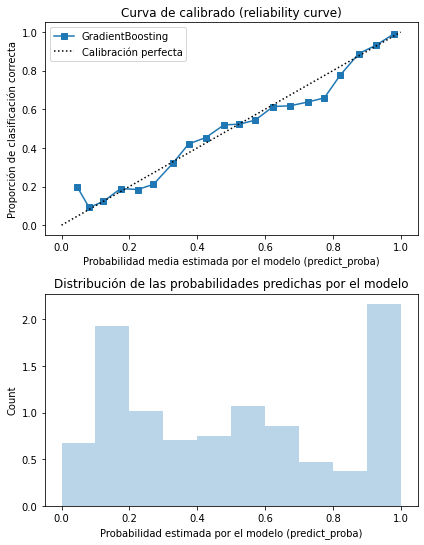

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(6, 2*3.84))

axs[0].plot(media_prob_predicha, fraccion_positivos, "s-", label="GradientBoosting")
axs[0].plot([0, 1], [0, 1], "k:", label="Calibración perfecta")
axs[0].set_ylabel("Proporción de clasificación correcta")
axs[0].set_xlabel("Probabilidad media estimada por el modelo (predict_proba)")
axs[0].set_title('Curva de calibrado (reliability curve)')
axs[0].legend()

axs[1].hist(prob_positivo, range=(0, 1), bins=10, density=True, lw=2, alpha = 0.3)
axs[1].set_xlabel("Probabilidad estimada por el modelo (predict_proba)")
axs[1].set_ylabel("Count")
axs[1].set_title('Distribución de las probabilidades predichas por el modelo')

plt.tight_layout()
plt.show();

In [73]:
valid=test[features]
valid= valid.astype('int')

In [74]:
prediccion=automl.predict(X = valid)
prediccion

array([0, 0, 1, ..., 1, 1, 1])

In [75]:
# Predicción de probabilidades
# ==============================================================================
predicciones = automl.predict_proba(X = valid)
predicciones[:5, :]
df_predicciones = pd.DataFrame(data=predicciones, columns=['0', '1'])
df_predicciones['clasificacion_default_0.5'] = np.where(df_predicciones['0']> 0.5, 0, 1)
df_predicciones['clasificacion_custom_0.6'] = np.where(df_predicciones['1'] > 0.65, 1, 0)
df_predicciones[df_predicciones['clasificacion_custom_0.6']!=df_predicciones['clasificacion_default_0.5']] \
.head(5)

,0,1,clasificacion_default_0.5,clasificacion_custom_0.6
4,0.421216,0.578784,1,0
5,0.460373,0.539627,1,0
26,0.488063,0.511937,1,0
37,0.478477,0.521523,1,0
38,0.487027,0.512973,1,0


In [76]:
submit=pd.DataFrame()
submit['PassengerId']=test['PassengerId']
submit['Transported']=prediccion
submit['Transported']=submit['Transported'].astype('bool')

In [77]:
submit['Transported'].value_counts()

False    2312
True     1965
Name: Transported, dtype: int64

In [78]:
submit.to_csv('submission.csv', index=False)
submit

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
